# Load Packages

First we load packages, we will be focusing on `numpy` for our data and `keras` for our modeling. Here we use the script called `extract_data` which will import the desired training and test sets as `numpy` arrays. 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from extract_data import training_set, test_set
from extract_data import class_set, class_test_set
from tensorflow import set_random_seed

set_random_seed(42) # For reproducibility
plt.style.use('ggplot') #ggplot2 style plots

Using TensorFlow backend.


# Exploratory analysis

First, I wanted to illustrate how the data set looks like so I pulled 8 random samples from our data set and then plotted the hand drawn numbers along with their respective values. As you can see compared to the sample pre-loaded in `sklearn` (which was 8x8 pixels) this data set has more pixels and allows us to differentiate the hand written nummbers better. 

In [2]:
random.seed(42)
# Empty list where we'll add pseudo-random numbers 
# within range of our index to plot them. 
rand_list = []

for x in range(8):
  rand_list.append(random.randint(1,60000))

Next we plot the 8 random samples.

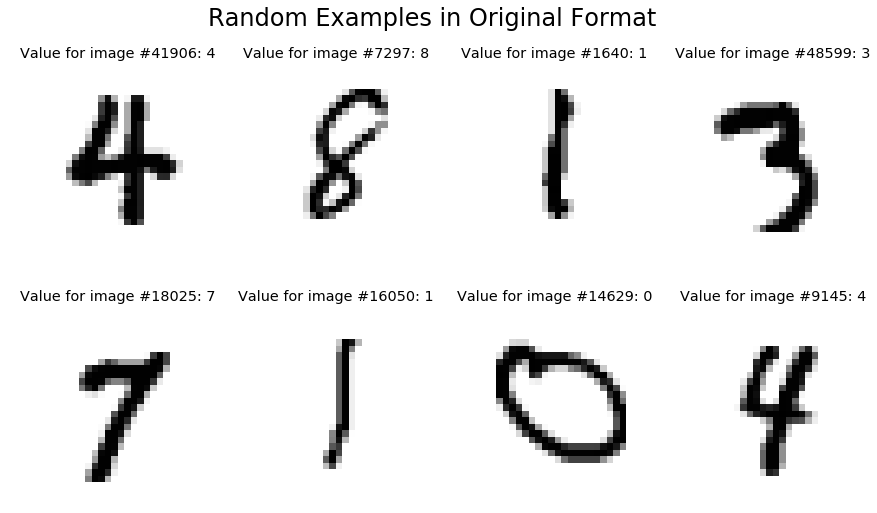

In [3]:
f, ax = plt.subplots(figsize=(15, 8))
for i in range(0, len(rand_list)):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    plt.title('Value for image #{0}: {1}'\
    .format(rand_list[i],
              class_set[rand_list[i]]))
    
    plt.imshow(training_set[rand_list[i]], 
               cmap=plt.cm.gray_r)

f.suptitle('Random Examples in Original Format', size = 24)
f.subplots_adjust(top=0.9)

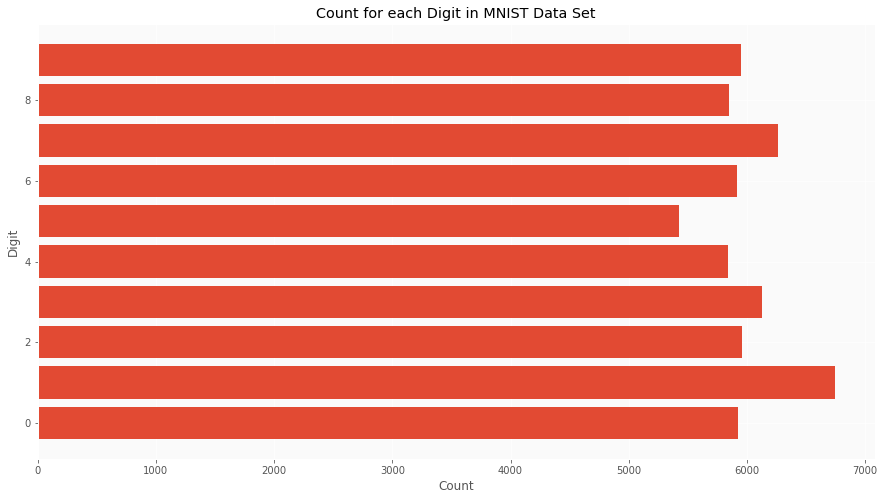

In [4]:
values, counts = np.unique(class_set, return_counts = True)

f, ax = plt.subplots(figsize=(15, 8))

ax.set_facecolor('#fafafa')
plt.barh(values, counts)
plt.title('Count for each Digit in MNIST Data Set')
plt.xlabel('Count')
plt.ylabel('Digit')
plt.show()

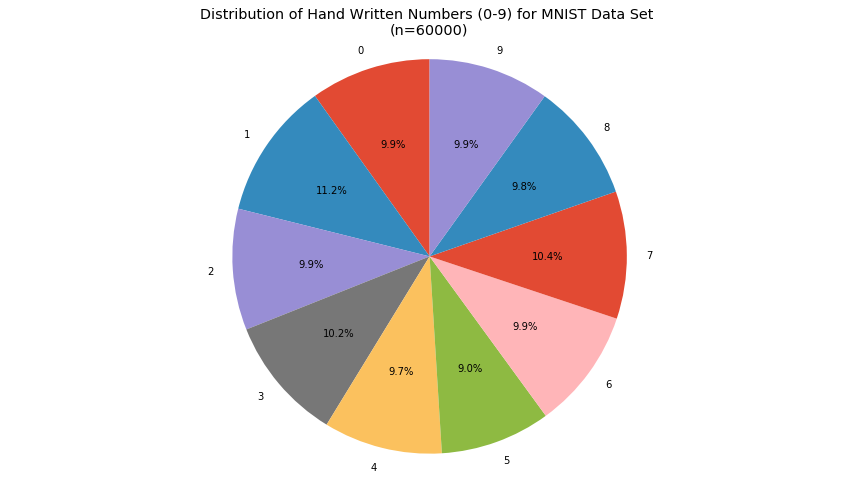

In [5]:
f, ax = plt.subplots(figsize=(15, 8))
plt.pie(counts, labels = values,
       autopct='%1.1f%%',
       startangle=90)
plt.axis('equal')
plt.title('Distribution of Hand Written Numbers (0-9) for MNIST Data Set \n(n=60000)')
plt.show()

The distribution shows no sign of *class imbalance* so we can move on to the modeling aspect. 

# Modeling

## Pre-Processing

We have a training set consisting of $N = 60000$ observations, $K = 10$ distinct target classes, and $D = 784$ features, since *28 pixels* multiplied by *28 pixels* = 784

Here we're flattening the arrays to the appropriate dimensions for data analysis (1x784 array), whereas the target sets are already in the correct format. 

In [6]:
training_set = training_set.reshape((len(training_set), -1)).astype('float')

In [7]:
training_set /= 255 # Make values range from [0, 1]

Utilizing `keras` encoder we will transform the class set to the *one hot encoder* representation. Using a `for loop`, I can show you the structure of the transformed class set compared to the original.   

In [8]:
class_set_encode = keras.utils.to_categorical(class_set, num_classes = 10)

In [9]:
for i in range(0, len(class_set_encode[:15])):
    print('Original Representation: {0}'.format(class_set[i]), 
          'New Represenation: ', 
          class_set_encode[i])

Original Representation: 5 New Represenation:  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Original Representation: 0 New Represenation:  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Original Representation: 4 New Represenation:  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
Original Representation: 1 New Represenation:  [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
Original Representation: 9 New Represenation:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
Original Representation: 2 New Represenation:  [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
Original Representation: 1 New Represenation:  [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
Original Representation: 3 New Represenation:  [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
Original Representation: 1 New Represenation:  [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
Original Representation: 4 New Represenation:  [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
Original Representation: 3 New Represenation:  [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
Original Representati

# Define Baseline Model 

Here we'll start our analysis by instantiating a model that we will use as a *baseline* model. This will be used as a comparison as we begin to *hypertune* parameters in our neural networks. 

For this demonstration I will be using what's called a multilayer perceptron or **MLP**, a feedforward neural network. 

In [10]:
# Instantiate model
model = Sequential()

In [11]:
# 784 Inputs in the visible Layer and 256 neurons within the first hidden layer 
model.add(Dense(256, input_dim = 784))

In [12]:
# Add relu activation function 
model.add(Activation('relu'))

In [13]:
model.add(Dense(256))

In [14]:
# Add relu activation function 
model.add(Activation('relu'))

In [15]:
# Create the output layer with the appropriate target class (10 cus 10 digits in data)
model.add(Dense(10))

In [16]:
# Add final activation function, recommended softmax for multi-class classification 
model.add(Activation('softmax'))

In [17]:
model.compile(optimizer = 'adam',
           loss = 'categorical_crossentropy',
           metrics = ['accuracy'])

In [18]:
model.fit(training_set, class_set_encode,
          batch_size = 128, # Sample size per epoch
          epochs = 12, # Number of epochs
          validation_split=0.1, # 10% of the data held out for cross validation
          verbose = 1) # Verbose to True to read meta data on epochs

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 6s 113us/step - loss: 0.2707 - acc: 0.9212 - val_loss: 0.1108 - val_acc: 0.9660
Epoch 2/12
54000/54000 [==============================] - 6s 110us/step - loss: 0.1003 - acc: 0.9696 - val_loss: 0.0819 - val_acc: 0.9743
Epoch 3/12
54000/54000 [==============================] - 6s 120us/step - loss: 0.0636 - acc: 0.9806 - val_loss: 0.0759 - val_acc: 0.9777
Epoch 4/12
54000/54000 [==============================] - 5s 91us/step - loss: 0.0466 - acc: 0.9854 - val_loss: 0.0790 - val_acc: 0.9767
Epoch 5/12
54000/54000 [==============================] - 5s 87us/step - loss: 0.0347 - acc: 0.9888 - val_loss: 0.0700 - val_acc: 0.9798
Epoch 6/12
54000/54000 [==============================] - 6s 112us/step - loss: 0.0259 - acc: 0.9912 - val_loss: 0.0860 - val_acc: 0.9782
Epoch 7/12
54000/54000 [==============================] - 5s 97us/step - loss: 0.0214 - acc: 0.9932 - val_loss: 0.0814 - val_

In [19]:
loss, accuracy = model.evaluate(training_set, class_set_encode, verbose=1)

60000/60000 [==============================] - 4s 68us/step


In [20]:
print('Training Accuracy: {0}'.format(round(accuracy, 4)))

Training Accuracy: 0.9942


Looks good but remember we aren't to concerned with the training set metrics, I only did this as a precursor to test set metrics, but until I become more educated on neural networks and `keras` I'll end it here. 

# To be continued...

+ Iteratively build model without being computationally expensive (how do)
+ Hyperparameter Optimization
+ Model Evolution (Currently MLP, maybe CNN next?)
+ Test Set metrics